# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Introduction to python: practicals

Within this notebook we'll go over some basic principles of python's functionality by going through (more or less) typical workflows for different types of data. In more detail, we'll start with a workflow that aims to analyse data from a `.csv` file, hence building upon the previous section. Afterwards, we'll do comparable steps using neuromaging data, that is an anatomical and a functional image. Within both example workflows the aim is to get familiar with classes, data types and other important core principles of python. 

To this end, the notebook is divided in two general parts: 

- [Example workflow using a .csv file](#examples-using-a-.csv-file)
- [examples using .nii files](#examples-using-neuroimaging-files)

## Part 1: Example workflow using a .csv file

Imagine you have a .csv file with some data in it and want to analyze that data. Your worklfow to do so will most likely consist of different steps: loading the data, "cleaning" the data, exploring the data, analyzing the data and visualization of the data/results. In the following, we'll briefly go through all of these steps.

As we recently learnt in the previous section, the first step is always to load necessary packages and/or functions. Most of the time, it is not clear what exactly is needed along the worklfow. Hence, starting with respective packages/functions we're sure about is a good idea. This is most likely based on the data you want to analyze. As we want to have a look at some data in a `.csv` file, `numpy` is a good starting point:

Let's import the entire `numpy` package (do you know/remember some of the other import options?):

In [1]:
import numpy as np

Using `np.` + `tab` provides us with a nice overview of `numpy`'s functionality:

In [ ]:
np.

In case, we are not sure about how a certain function works or simply want to know more about it, we can use the help function:

In [2]:
help(np.array)

Help on built-in function array in module numpy:

array(...)
    array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        __array__ method returns an array, or any (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then the type will
        be determined as the minimum type required to hold the objects in the
        sequence.  This argument can only be used to 'upcast' the array.  For
        downcasting, use the .astype(t) method.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if __array__ returns a copy, if obj is a nested sequence,
        or if a copy is needed to satisfy any of the other requirements
        (`dtype`, `order`, etc.).
    order : {'K', 'A', 'C', 'F'}

Based on our goal, the `genfromtxt` function looks useful, as we initially need to load the data from the `.csv` file:

In [3]:
my_data_numpy = np.genfromtxt('brainsize.csv', delimiter=';')

With that, we generated a variable called `my_data_numpy`. Now, let's check its `type`. 

In [4]:
type(my_data_numpy)

numpy.ndarray

It is a `numpy.ndarray` and within it, the data is stored. 

In [5]:
my_data_numpy

array([[         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan],
       [         nan,          nan, 1.330000e+02, 1.320000e+02,
        1.240000e+02,          nan,          nan, 8.169320e+05],
       [         nan,          nan, 1.400000e+02, 1.500000e+02,
        1.240000e+02,          nan,          nan, 1.001121e+06],
       [         nan,          nan, 1.390000e+02, 1.230000e+02,
        1.500000e+02,          nan,          nan, 1.038437e+06],
       [         nan,          nan, 1.330000e+02, 1.290000e+02,
        1.280000e+02,          nan,          nan, 9.653530e+05],
       [         nan,          nan, 1.370000e+02, 1.320000e+02,
        1.340000e+02,          nan,          nan, 9.515450e+05],
       [         nan,          nan, 9.900000e+01, 9.000000e+01,
        1.100000e+02,          nan,          nan, 9.287990e+05],
       [         nan,          nan, 1.380000e+02, 1.360000e+02,
        1.310000e+02,          na

As we saw in the previous section and help function above, objects and data types come with certain functionality:

In [ ]:
my_data_numpy.

We can, for example, check the shape, that is the dimensionality, of the data: 

In [6]:
my_data_numpy.shape

(41, 8)

This returns not a `numpy.ndarray`, but a `tuple`:

In [7]:
type(my_data_numpy.shape)

tuple

It is also possible to concatenate functionality. E.g., we could also transpose our `numpy.ndarray` and check its resulting `shape` within one command:

In [8]:
my_data_numpy.transpose().shape

(8, 41)

Is it possible to view only certain parts of the data, i.e. the second row? Yes, using `slicing`. 

In [9]:
my_data_numpy[1]

array([        nan,         nan, 1.33000e+02, 1.32000e+02, 1.24000e+02,
               nan,         nan, 8.16932e+05])

The output is a `numpy.ndarray` again:

In [10]:
type(my_data_numpy[1])

numpy.ndarray

If we want to be more specific, it is also possible to only view one value, i.e. the fourth value of the second row:

In [11]:
my_data_numpy[1, 3]

132.0

Now, the data type has changed to `numpy.float64`:

In [12]:
type(my_data_numpy[1, 3])

numpy.float64

However, getting more than one value, i.e. multiple values of the second row, results in a `numpy.ndarray` again:

In [13]:
my_data_numpy[1, 3:6]

array([132., 124.,  nan])

Let's look at our data again:

In [14]:
my_data_numpy

array([[         nan,          nan,          nan,          nan,
                 nan,          nan,          nan,          nan],
       [         nan,          nan, 1.330000e+02, 1.320000e+02,
        1.240000e+02,          nan,          nan, 8.169320e+05],
       [         nan,          nan, 1.400000e+02, 1.500000e+02,
        1.240000e+02,          nan,          nan, 1.001121e+06],
       [         nan,          nan, 1.390000e+02, 1.230000e+02,
        1.500000e+02,          nan,          nan, 1.038437e+06],
       [         nan,          nan, 1.330000e+02, 1.290000e+02,
        1.280000e+02,          nan,          nan, 9.653530e+05],
       [         nan,          nan, 1.370000e+02, 1.320000e+02,
        1.340000e+02,          nan,          nan, 9.515450e+05],
       [         nan,          nan, 9.900000e+01, 9.000000e+01,
        1.100000e+02,          nan,          nan, 9.287990e+05],
       [         nan,          nan, 1.380000e+02, 1.360000e+02,
        1.310000e+02,          na

Even though it's a small dataset, there's already a lot going on: different data types, different columns, etc. and apparently not everything is "`numpy`" compatible. 
`Numpy` is a great tool and very powerful, building the foundation for a lot of python libraries, but as seen in the previous section, the `pandas` package is very convenient when you're working with tabular data. Hence, let's try it. At first, we have to import it:

In [15]:
import pandas as pd

Now we can check its functionality:

In [ ]:
pd.

`read_csv` looks helpful regarding loading the data:

In [16]:
my_data_pandas = pd.read_csv('brainsize.csv', delimiter=',')

What do we have? A `pandas dataframe`:

In [17]:
type(my_data_pandas)

pandas.core.frame.DataFrame

While before, our data was in `np.ndarray` format:

In [18]:
type(my_data_numpy)

numpy.ndarray

How does our data look now?

In [19]:
my_data_pandas

,";""Hair"";""FSIQ"";""VIQ"";""PIQ"";""Weight"";""Height"";""MRI_Count"""
0,"1;""white"";133;132;124;""118"";""64.5"";816932"
1,"2;""black"";140;150;124;""."";""72.5"";1001121"
2,"3;""black"";139;123;150;""143"";""73.3"";1038437"
3,"4;""black"";133;129;128;""172"";""68.8"";965353"
4,"5;""white"";137;132;134;""147"";""65.0"";951545"
5,"6;""white"";99;90;110;""146"";""69.0"";928799"
6,"7;""white"";138;136;131;""138"";""64.5"";991305"
7,"8;""white"";92;90;98;""175"";""66.0"";854258"
8,"9;""black"";89;93;84;""134"";""66.3"";904858"
9,"10;""black"";133;114;147;""172"";""68.8"";955466"


Even though we already have more information as in numpy array, e.g., headers, strings and indexes, it still looks off. What's the problem? Well, we see that our data has a `;` as a `delimiter`, but we indicated `,` as delimiter when loading our data. Therefore, it is important to carefully check your data and beware of its specifics. Let's reload our data with the fitting `delimiter`:

In [20]:
my_data_pandas = pd.read_csv('brainsize.csv', delimiter=';')

Investigating our `dataframe`, we see that it worked as expected this time:

In [21]:
my_data_pandas

,Unnamed: 0,Hair,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,white,133,132,124,118,64.5,816932
1,2,black,140,150,124,.,72.5,1001121
2,3,black,139,123,150,143,73.3,1038437
3,4,black,133,129,128,172,68.8,965353
4,5,white,137,132,134,147,65.0,951545
5,6,white,99,90,110,146,69.0,928799
6,7,white,138,136,131,138,64.5,991305
7,8,white,92,90,98,175,66.0,854258
8,9,black,89,93,84,134,66.3,904858
9,10,black,133,114,147,172,68.8,955466


Thinking about our `numpy.ndarray` version, we see a difference in the `shape` of the data, which is related to the `header`:

In [22]:
my_data_pandas.shape

(40, 8)

What can we do with our `dataframe`:

In [ ]:
my_data_pandas.

For example we can and should rename columns with uninformative names:

In [23]:
my_data_pandas.rename(columns={'Unnamed: 0': 'sub-id'})

,sub-id,Hair,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,white,133,132,124,118,64.5,816932
1,2,black,140,150,124,.,72.5,1001121
2,3,black,139,123,150,143,73.3,1038437
3,4,black,133,129,128,172,68.8,965353
4,5,white,137,132,134,147,65.0,951545
5,6,white,99,90,110,146,69.0,928799
6,7,white,138,136,131,138,64.5,991305
7,8,white,92,90,98,175,66.0,854258
8,9,black,89,93,84,134,66.3,904858
9,10,black,133,114,147,172,68.8,955466


That looks a bit more informative, doesn't it?

In [24]:
my_data_pandas.columns

Index(['Unnamed: 0', 'Hair', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

Wait a minute, it's not renamed. Did we do something wrong? Let's check the respective `functionality`:

In [25]:
help(my_data_pandas.rename)

Help on method rename in module pandas.core.frame:

rename(mapper=None, index=None, columns=None, axis=None, copy=True, inplace=False, level=None) method of pandas.core.frame.DataFrame instance
    Alter axes labels.
    
    Function / dict values must be unique (1-to-1). Labels not contained in
    a dict / Series will be left as-is. Extra labels listed don't throw an
    error.
    
    See the :ref:`user guide <basics.rename>` for more.
    
    Parameters
    ----------
    mapper, index, columns : dict-like or function, optional
        dict-like or functions transformations to apply to
        that axis' values. Use either ``mapper`` and ``axis`` to
        specify the axis to target with ``mapper``, or ``index`` and
        ``columns``.
    axis : int or str, optional
        Axis to target with ``mapper``. Can be either the axis name
        ('index', 'columns') or number (0, 1). The default is 'index'.
    copy : boolean, default True
        Also copy underlying data
    inp

Checking the functionality more in depth, a `dataframe` with the new column names is returned, but the old one not automatically changed. Hence, we have to do it again, this overwriting the original `dataframe`:

In [26]:
my_data_pandas=my_data_pandas.rename(columns={'Unnamed: 0': 'sub-id'})
my_data_pandas.columns

Index(['sub-id', 'Hair', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

`Pandas` also allows the easy and fast exploration of our data:  

In [27]:
my_data_pandas.describe()

,sub-id,FSIQ,VIQ,PIQ,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,1.079549e+06


Unfortunately, not all columns there. But why is that? We need to investigate columns more closely.

In [28]:
type(my_data_pandas['sub-id'])

pandas.core.series.Series

The data in the columns is a `pandas series`, not a `dataframe` or `numpy.ndarray`, again with its own functionality.
Let's check the first missing column:

In [29]:
type(my_data_pandas['Hair'])

pandas.core.series.Series

Well, that's not very informative on its own, as we're interested in the type of the values. Luckily, the `pandas dataframe` object comes with a helpful functionality:

In [30]:
my_data_pandas.dtypes

sub-id        int64
Hair         object
FSIQ          int64
VIQ           int64
PIQ           int64
Weight       object
Height       object
MRI_Count     int64
dtype: object

And a bit more closely:

In [31]:
type(my_data_pandas['Hair'][0])

str

The data in `my_data_pandas['Hair']` has the type `str` and as you might have already guessed: it's rather hard to compute summary statistics from `str`. We could re-code it, but given there are only two values, this might not be very useful for current aim: 

In [32]:
my_data_pandas['Hair'].unique()

array(['white', 'black'], dtype=object)

What about the other missing columns, e.g., `height`?

In [33]:
type(my_data_pandas['Height'][0])

str

The data type is yet again `str`, but how many values do we have?

In [34]:
my_data_pandas['Height'].unique()

array(['64.5', '72.5', '73.3', '68.8', '65.0', '69.0', '66.0', '66.3',
       '70.0', '70.5', '68.0', '68.5', '73.5', '.', '76.5', '62.0',
       '63.0', '72.0', '77.0', '66.5', '62.5', '67.0', '75.5', '74.0'],
      dtype=object)

Hm, we can see that `height` contains numerical values. However, the `data type` is `str`. Here it can be useful to change the `data type`, using ` pandas dataframe` object functionality:

In [35]:
my_data_pandas['Height'].astype(float)

ValueError: could not convert string to float: '.'

And we're getting another error. This time, it's related to a missing data point, which needs to be addressed before the conversion is possible. We can simply use the `replace` functionality to `replace` the missing data point to `NaN`, which should as allow to do the conversion:

In [36]:
my_data_pandas['Height'] = my_data_pandas['Height'].replace('.', np.nan)

In [37]:
my_data_pandas['Height'] = my_data_pandas['Height'].astype(float)

Let's check if the column is now included in the summary:

In [38]:
my_data_pandas.describe()

,sub-id,FSIQ,VIQ,PIQ,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,77.000000,1.079549e+06


Now, we can do the same for the `Weight` column, concatenating all necessary `functions` in one line:

In [39]:
my_data_pandas['Weight'] = my_data_pandas['Weight'].replace('.', np.nan).astype(float)

Is `Weight` now included?

In [40]:
my_data_pandas.describe()

,sub-id,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


We can also compute one statistical value for one column, for example the mean using `numpy`:

In [41]:
np.mean(my_data_pandas['Weight'])

151.05263157894737

But the same is also possible using inbuilt `pandas data frame` functionality:

In [42]:
my_data_pandas['Weight'].mean()

151.05263157894737

We can do the same for the standard deviation:

In [43]:
np.std(my_data_pandas['Weight'])

23.167521922341212

In [44]:
my_data_pandas['Weight'].std()

23.478509286005146

Here we can see, the same functionality can lead to different results, potentially based on different implementations. As we spent some time with the `Height` and `Weight` of the brains in our data set, let's visualize their relationship.

### Visualization using matplotlib

Python has quite a lot of visualization packages. Undeniably, the most famous and at the same time versatile, that additionally is the basis of most others, is [matplotlib](https://matplotlib.org/). Lets import it: 

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

We're going to use the `plot` function for our first plot of the relationship between `Height` and `Weight`, where the function should be called as follows: `plt.plot(x, y)`:

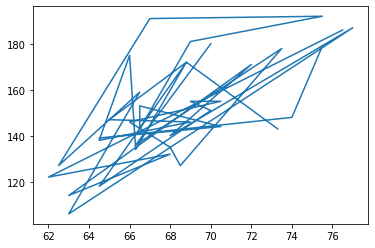

In [46]:
plt.plot(my_data_pandas['Height'], my_data_pandas['Weight'])

I think we can agree, that is not very informative. Once more, it is important to be aware of your data and what you would like to achieve. Data visualization is no exception to that. However, as you will go through everything visualization on Thursday, we'll only spent a brief look at it. As we want to visualize the relationship between two variable, a `scatterplot` might be a good starting point:

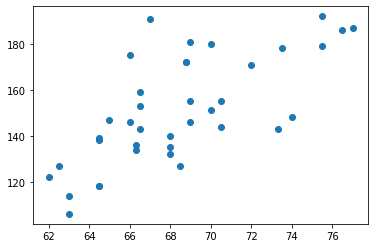

In [47]:
plt.scatter(my_data_pandas['Height'], my_data_pandas['Weight'])

That already looks way more interpretable. Nevertheless, we could add some more information, as for example the titles of the `x` and `y` axis to indicate what is plotted. To do so, we can simply add this information to the to be generated plot using `plt.xlabel` and `plt.ylabel`:

Text(0, 0.5, 'Weight')

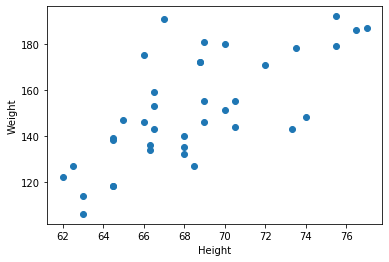

In [48]:
plt.scatter(my_data_pandas['Height'], my_data_pandas['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')

The same holds true for the title of our graphic, using `plt.title`:

Text(0.5, 1.0, 'Comparing Height and Weight')

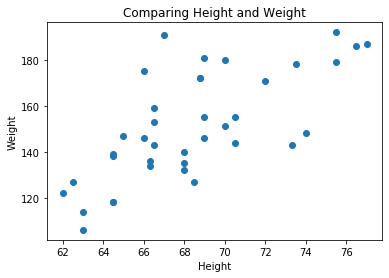

In [49]:
plt.scatter(my_data_pandas['Height'], my_data_pandas['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Comparing Height and Weight')

But what exactly is returned from the plotting function? You can think of it as an object that includes the figure itself, as well as its parts (e.g. the axes) and is filled with information that is organized based on a certain principle.

matplotlib.collections.PathCollection

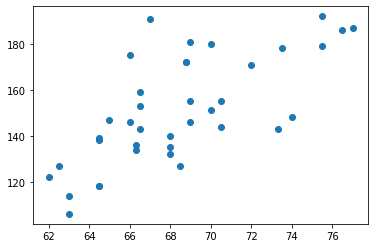

In [50]:
type(plt.scatter(my_data_pandas['Height'], my_data_pandas['Weight']))

Thinking about that, we can explore a different approach to plotting, where we at first generate our figure and access certain parts of it, in order to modify them:

Text(0.5, 1.0, 'Comparing Height and Weight')

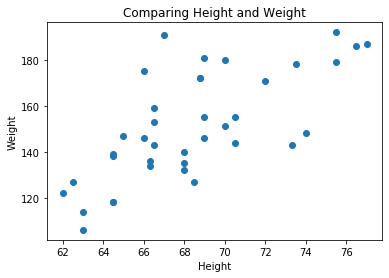

In [51]:
fig = plt.scatter(my_data_pandas['Height'], my_data_pandas['Weight'])
ax = fig.axes
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_title('Comparing Height and Weight')

As `numpy` is the underlying workhorse for a lot of math/stats/etc libraries/functions, e.g. `pandas`, `matplotlib` is the basis for most python visualization packages/functions, like e.g. `seaborn`, which additionally integrates with `pandas`. This shows you how nicely different libraries can be integrated with and build upon one another, creating a new powerful library. To give you an example, let's use `seaborn` to recreate the plot from above.

### Visualization using seaborn

In [52]:
import seaborn as sns

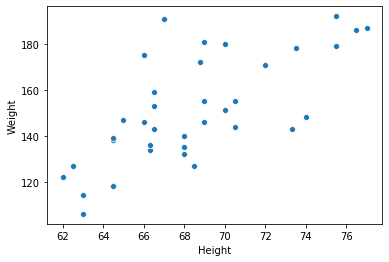

In [53]:
sns.scatterplot(my_data_pandas['Height'], my_data_pandas['Weight'])

You can see, that the plot looks slightly different (e.g., size) and already includes axis labels. In order to add a title, we can use the same functionality as before. While `seaborn` easily creates high end graphics, `matplotlib` can be (and most often is) used to tweak visualizations:

Text(0.5, 1.0, 'Comparing Height and Weight')

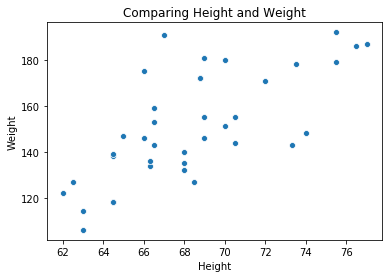

In [54]:
sns.scatterplot(my_data_pandas['Height'], my_data_pandas['Weight'])
plt.title('Comparing Height and Weight')

With `seaborn` we can also automatically compute and plot a regression between our variables, further investigation their relationship, using the `regplot` function in `seaborn`:

Text(0.5, 1.0, 'Comparing Height and Weight')

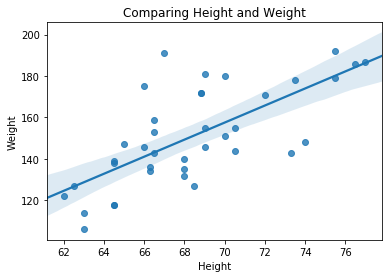

In [55]:
sns.regplot(my_data_pandas['Height'], my_data_pandas['Weight'])
plt.title('Comparing Height and Weight')

Last but not least, we can even include the distribution of our variables in the same plot, using `seaborn`s `jointplot` function:

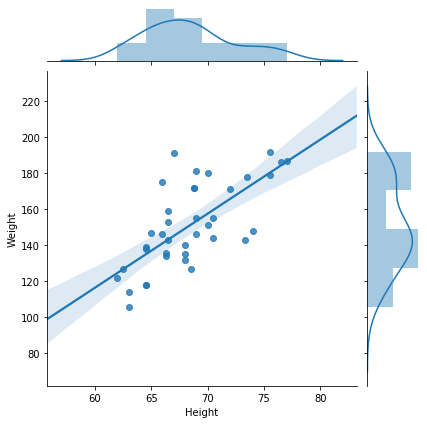

In [56]:
sns.jointplot(x=my_data_pandas['Height'], y=my_data_pandas['Weight'], kind='reg')

## Examples using neuroimaging files

In recent years many great python libraries focusing a variety of aspects of neuroimaging and the analyses of the corresponding data have been developed. The workflow steps are comparable to those of other data types (e.g. the .csv file we just explored). The neuroimaging equivalent for `numpy` and `matploblib` in terms of the underlying workhorse for a multitude of libraries is [nibabel](https://nipy.org/nibabel/). `Nibabel` is a low-level Python library that gives access to a variety of imaging formats, with a particular focus on providing a common interface to the various volumetric formats produced by scanners and used in common neuroimaging toolkits. The same (to a slightly lesser extend) holds true for neuroimaging data in surface format.

In [57]:
import nibabel as nib

In [ ]:
nb.

To ease up the handling of data paths later on, let's define the path to our example neuroimaging dataset. 

In [60]:
datapath = '/Users/peerherholz/Desktop/nds_ds_example/'

We can use the `os` library to help us. For example to concatenate the path to the dataset and the specific data we're interested in, using the `join` functionality from `os.path`. Let's begin with defining the path to an antomical image, checking if it exists in the path we specified:

In [62]:
import os.path as op

In [64]:
img_filename = op.join(datapath, 'sub-01/anat/sub-01_T1w.nii.gz')
print(img_filename)
assert op.exists(img_filename)

/Users/peerherholz/Desktop/nds_ds_example/sub-01/anat/sub-01_T1w.nii.gz


Looks good. Next use `nibabel`'s `load` function to load the image:

In [65]:
anat = nib.load(img_filename)

Once loaded, our image has the following data type: `nibabel.nifti1.Nifti1Image`.

In [66]:
type(anat)

nibabel.nifti1.Nifti1Image

What do we have in our variable? Lots of information!

In [67]:
print(anat)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (160, 192, 192)
affine: 
[[ 9.99961793e-01  0.00000000e+00 -1.16353519e-02 -8.47732315e+01]
 [ 0.00000000e+00  1.33333337e+00  0.00000000e+00 -1.40180023e+02]
 [ 8.72651301e-03  0.00000000e+00  1.33328259e+00 -1.44202881e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 160 192 192   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.        0.9999999 1.3333334 1.3333334 2.3       1.        1.
 1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max 

In more detail, it includes three core components: the image `affine`, the image `header` and the image `data` itself:

In [ ]:
anat.

We can access and work with all of these components, for example the `affine`:

In [68]:
anat_affine = anat.affine

Can you guess the data type?

In [69]:
type(anat_affine)

numpy.ndarray

The affine is a 4 x 4 numpy array. This describes the transformation from the voxel space (indices [i, j, k]) to the reference space (distance in mm (x, y, z)).

In [70]:
anat_affine

array([[ 9.99961793e-01,  0.00000000e+00, -1.16353519e-02,
        -8.47732315e+01],
       [ 0.00000000e+00,  1.33333337e+00,  0.00000000e+00,
        -1.40180023e+02],
       [ 8.72651301e-03,  0.00000000e+00,  1.33328259e+00,
        -1.44202881e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

It can be used, for instance, to discover the voxel that contains the origin of the image:

In [71]:
# more interpretable, getting center voxels
x, y, z, _ = np.linalg.pinv(anat_affine).dot(np.array([0, 0, 0, 1])).astype(int)

print("Affine:")
print(anat_affine)
print
print("Center: ({:d}, {:d}, {:d})".format(x, y, z))

Affine:
[[ 9.99961793e-01  0.00000000e+00 -1.16353519e-02 -8.47732315e+01]
 [ 0.00000000e+00  1.33333337e+00  0.00000000e+00 -1.40180023e+02]
 [ 8.72651301e-03  0.00000000e+00  1.33328259e+00 -1.44202881e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Center: (86, 105, 107)


The affine also encodes the axis orientation and voxel sizes:

In [72]:
nib.aff2axcodes(anat_affine)

('R', 'A', 'S')

In [73]:
nib.affines.voxel_sizes(anat_affine)

array([0.99999987, 1.33333337, 1.33333336])

That's already very cool and enables a very low level access to neuroimaging data. The same holds true for the header. It's a structure that stores all of the metadata of the image. You can query it directly, if necessary:

In [74]:
anat_header = anat.header

It's data type is `nibabel.nifti1.Nifti1Header`.

In [75]:
type(anat_header)

nibabel.nifti1.Nifti1Header

And it's a bit more complex than the affine:

In [76]:
print(anat_header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 160 192 192   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.        0.9999999 1.3333334 1.3333334 2.3       1.        1.
 1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FreeSurfer May 13 2013'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : -0.0043632984
quatern_d       : 0.0
qoffset_x       : -84.77323
qoffset_y 

Let's check some of the metadata:

In [77]:
anat_header['descrip']

array(b'FreeSurfer May 13 2013', dtype='|S80')

Or more "classic" values like the voxel resolution and TR:

In [78]:
anat_header['pixdim']

array([1.       , 0.9999999, 1.3333334, 1.3333334, 2.3      , 1.       ,
       1.       , 1.       ], dtype=float32)

The units of these values:

In [79]:
anat_header.get_xyzt_units()

('mm', 'sec')

`Nibabel` also has a command line interface called `nib-ls` which gives quite some information very easily:

In [80]:
!nib-ls '/Users/peerherholz/Desktop/nds_ds_example/sub-01/anat/sub-01_T1w.nii.gz'

/Users/peerherholz/Desktop/nds_ds_example/sub-01/anat/sub-01_T1w.nii.gz float32 [160, 192, 192] 1.00x1.33x1.33   sform



It can also provide only certain information if desired:

In [81]:
!nib-ls -H descrip '/Users/peerherholz/Desktop/nds_ds_example/sub-01/anat/sub-01_T1w.nii.gz'

/Users/peerherholz/Desktop/nds_ds_example/sub-01/anat/sub-01_T1w.nii.gz float32 [160, 192, 192] 1.00x1.33x1.33   b'FreeSurfer May 13 2013' sform



After exploring different aspects, let's inspect the data itself. At first we have to access it:

In [82]:
anat_data = anat.get_data()

The cool thing now is, that the data is in a well-known format: `numpy.ndarray`.

In [83]:
type(anat_data)

numpy.ndarray

Therefore, everything we explored so far is also possible with our example neuroimaging data. For example, we can inspect the shape of our `numpy.ndarray`. Do you know this reflects?

In [84]:
anat_data.shape

(160, 192, 192)

How does the data itself look?

In [85]:
anat_data

array([[[ 9., 26., 11., ..., 10.,  5.,  0.],
        [ 4., 10., 13., ...,  7.,  5.,  0.],
        [ 5.,  8., 12., ...,  5., 10.,  0.],
        ...,
        [11.,  5.,  8., ...,  5.,  8.,  0.],
        [12.,  4.,  4., ...,  9., 13.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[13.,  7., 10., ..., 11.,  7.,  0.],
        [18., 18.,  1., ...,  5., 24.,  0.],
        [15.,  7.,  2., ...,  4., 16.,  0.],
        ...,
        [ 6., 18.,  9., ...,  5., 10.,  0.],
        [ 8.,  8.,  8., ..., 14., 10.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 5.,  8.,  9., ...,  5., 14.,  0.],
        [13.,  9.,  9., ...,  1., 30.,  0.],
        [26.,  5., 12., ..., 13., 12.,  0.],
        ...,
        [13., 21., 13., ...,  4.,  7.,  0.],
        [ 4., 11., 21., ..., 10., 10.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ...,

       [[ 9.,  4., 10., ...,  8.,  9.,  0.],
        [14.,  9.,  3., ...,  3., 18.,  0.],
        [ 4., 12.,  5., ...,  2., 12.,  0.

Coolio, but not very informative. How about we access certain parts of the data (`slicing` again) and plot it? Quick test, what do we see, where is what?

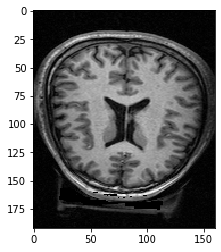

In [86]:
plt.imshow(anat_data[:, :,anat_data.shape[2]//2].T, cmap='Greys_r')

Even though we can do everything plotting with `matplotlib`, we can also use `nibabel`'s inbuilt plotting functionality called `orthoview`: 

<OrthoSlicer3D: /Users/peerherholz/Desktop/nds_ds_example/sub-01/anat/sub-01_T1w.nii.gz (160, 192, 192)>

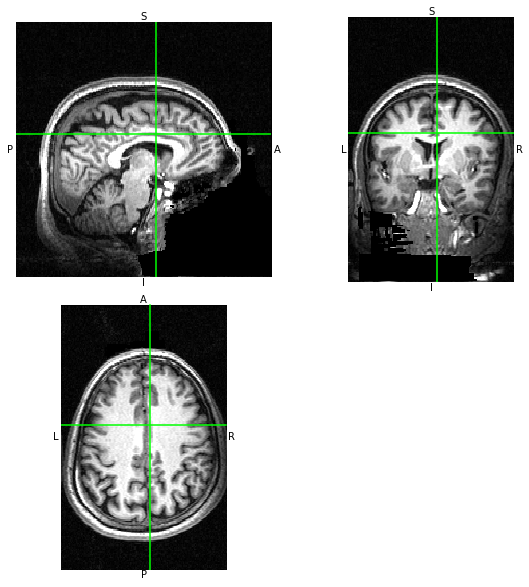

In [87]:
anat.orthoview()

More information at once eh? Now let's check a functional image of the same participant:

In [88]:
# check the same for a functional image of the same subject
func_rel_filename = 'sub-01/func/sub-01_task-stopmanual_run-1_bold.nii.gz'
func_filename = op.join(datapath, func_rel_filename)
func_img = nib.load(func_filename)

It's again a `nibabel.nifti1.Nifti1Image`. 

In [89]:
type(func_img)

nibabel.nifti1.Nifti1Image

With all the information we've seen in the anatomical image:

In [90]:
func_img_affine = func_img.affine

In [91]:
type(func_img_affine)

numpy.ndarray

In [92]:
func_img_affine

array([[-3.12500000e+00,  0.00000000e+00,  1.03648245e-16,
         9.26392212e+01],
       [-0.00000000e+00,  2.91743875e+00, -1.43347192e+00,
        -8.66088638e+01],
       [ 8.67361738e-17,  1.11989999e+00,  3.73432159e+00,
        -1.05874794e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [93]:
x, y, z, _ = np.linalg.pinv(func_img_affine).dot(np.array([0, 0, 0, 1])).astype(int)

print("Affine:")
print(func_img_affine)
print
print("Center: ({:d}, {:d}, {:d})".format(x, y, z))

Affine:
[[-3.12500000e+00  0.00000000e+00  1.03648245e-16  9.26392212e+01]
 [-0.00000000e+00  2.91743875e+00 -1.43347192e+00 -8.66088638e+01]
 [ 8.67361738e-17  1.11989999e+00  3.73432159e+00 -1.05874794e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Center: (29, 38, 16)


In [94]:
nib.aff2axcodes(func_img_affine)

('L', 'A', 'S')

In [95]:
nib.affines.voxel_sizes(func_img_affine)

array([3.125     , 3.12499997, 3.99999994])

In [96]:
func_img_header = func_img.header

In [97]:
type(func_img_header)

nibabel.nifti1.Nifti1Header

In [98]:
print(func_img_header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 57
dim             : [  4  64  64  33 182   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.     3.125  3.125  4.     2.     0.     0.     0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 10922
glmin           : -1421082624
descrip         : b'TE=30;Time=162234.930;phase=1'
aux_file        : b'imgComments'
qform_code      : scanner
sform_code      : scanner
quatern_b       : -8.3988384e-20
quatern_c       : -0.9832549
quatern_d       : -0.18223554
qoffset_

In [99]:
func_img_header['descrip']

array(b'TE=30;Time=162234.930;phase=1', dtype='|S80')

In [100]:
func_img_header['pixdim']

array([-1.   ,  3.125,  3.125,  4.   ,  2.   ,  0.   ,  0.   ,  0.   ],
      dtype=float32)

In [101]:
func_img_header.get_xyzt_units()

('mm', 'sec')

In [102]:
!nib-ls '/Users/peerherholz/Desktop/nds_ds_example/sub-01/func/sub-01_task-stopmanual_run-1_bold.nii.gz'

/Users/peerherholz/Desktop/nds_ds_example/sub-01/func/sub-01_task-stopmanual_run-1_bold.nii.gz int16 [ 64,  64,  33, 182] 3.12x3.12x4.00x2.00   sform



In [103]:
!nib-ls -H descrip '/Users/peerherholz/Desktop/nds_ds_example/sub-01/func/sub-01_task-stopmanual_run-1_bold.nii.gz'

/Users/peerherholz/Desktop/nds_ds_example/sub-01/func/sub-01_task-stopmanual_run-1_bold.nii.gz int16 [ 64,  64,  33, 182] 3.12x3.12x4.00x2.00   b'TE=30;Time=162234.930;phase=1' sform



In [104]:
func_img_data = func_img.get_data()

In [105]:
type(func_img_data)

numpy.ndarray

What is on of the core differences between our anatomical and functional image? The data shape can help to answer that question:

In [106]:
func_img_data.shape

(64, 64, 33, 182)

In [107]:
func_img_data

array([[[[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        [[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        [[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        ...,

        [[ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
    

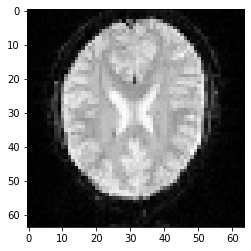

In [108]:
plt.imshow(func_img_data[:, :,func_img_data.shape[2]//2, 0].T, cmap='Greys_r')


<OrthoSlicer3D: /Users/peerherholz/Desktop/nds_ds_example/sub-01/func/sub-01_task-stopmanual_run-1_bold.nii.gz (64, 64, 33, 182)>

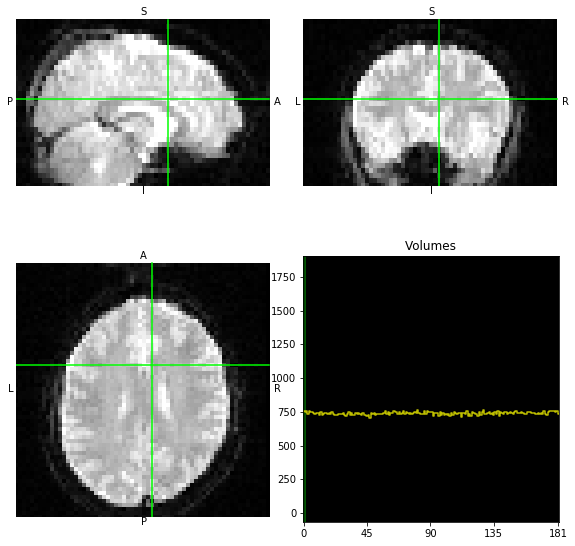

In [110]:
func_img.orthoview()

As the data of our functional image is now a `numpy.ndarray`, we can simply compute the mean over time:

In [111]:
mean_func_img = np.mean(func_img_data, axis=3)

How did the shape changed? We now have the same information in the first dimensions. However, the fourth, representing time, is gone.

In [112]:
mean_func_img.shape

(64, 64, 33)

`nibabel` functionality also allows to create a new image based on the computed mean of the data over time, the mean image. We just need to provide the computed data and the `affine` of the original image: 

In [113]:
mean_func_img = nib.Nifti1Image(mean_func_img, affine=func_img_affine)

Let's have a look:

<OrthoSlicer3D: (64, 64, 33)>

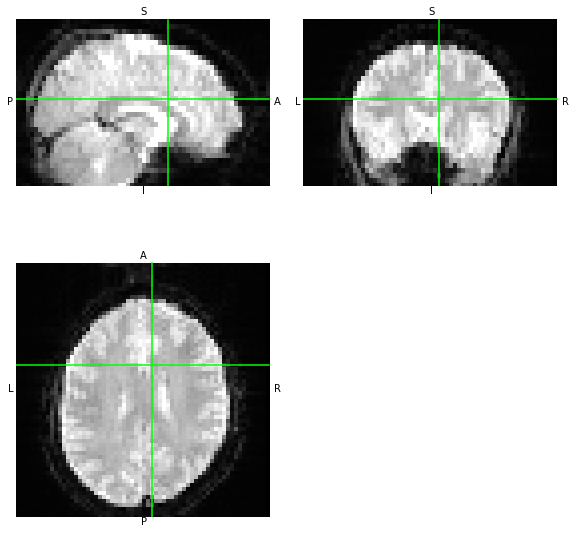

In [114]:
mean_func_img.orthoview()

Even though these basics are very important, most of the time you might be interested in more complex properties, e.g., mean image, voxel time series, image manipulation, etc. . A great library for these purposes covering simple to complex analyses is [nilearn](https://nilearn.github.io/).

In [115]:
import nilearn as nl

Through that, we have a lot of functionality:

In [ ]:
nl.

For example, if we want to compute the mean image again, `nilearn` has a nice function that does all the steps we just did in one step:

In [116]:
mean_func_img = nl.image.mean_img(func_img)

In [117]:
type(mean_func_img)

nibabel.nifti1.Nifti1Image

In [118]:
mean_func_img.shape

(64, 64, 33)

<OrthoSlicer3D: (64, 64, 33)>

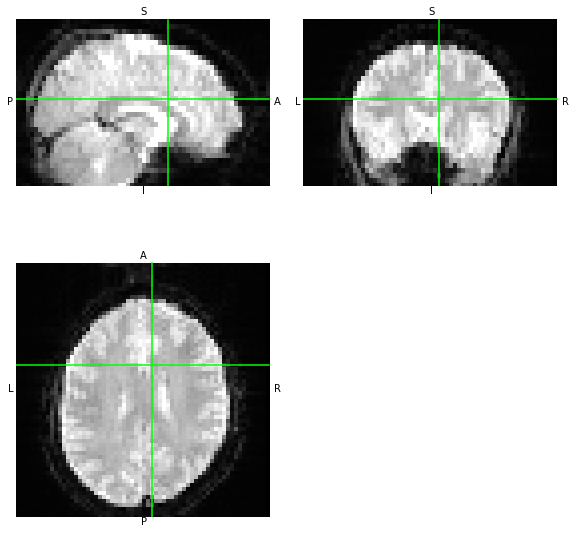

In [119]:
mean_func_img.orthoview()

This also works with providing the image file itself:

In [120]:
mean_func_img = nl.image.mean_img(func_filename)

In [121]:
type(mean_func_img)

nibabel.nifti1.Nifti1Image

In [122]:
mean_func_img.shape

(64, 64, 33)

<OrthoSlicer3D: (64, 64, 33)>

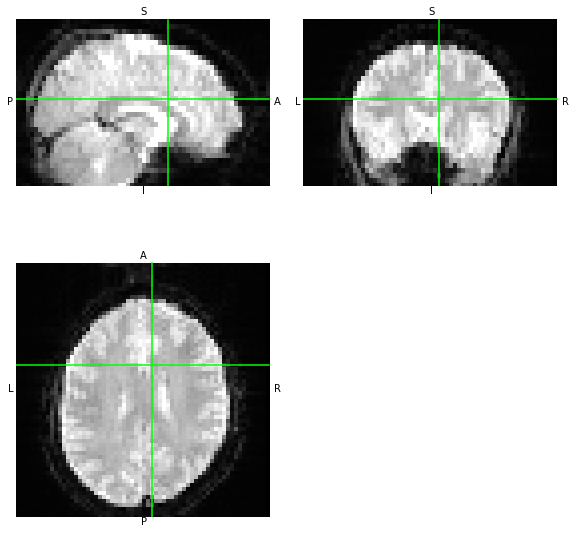

In [123]:
mean_func_img.orthoview()

`Nilearn` is also great for plotting, having a lot of functionality for diverse plotting aims:

In [124]:
from nilearn.plotting import plot_anat, plot_epi, plot_img, plot_roi

We can plot an anatomical image:

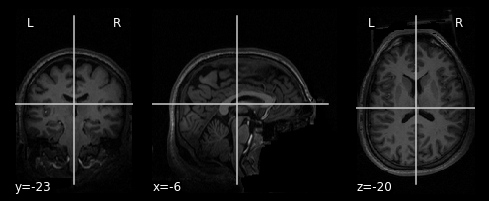

In [125]:
plot_anat(anat)

A functional one:

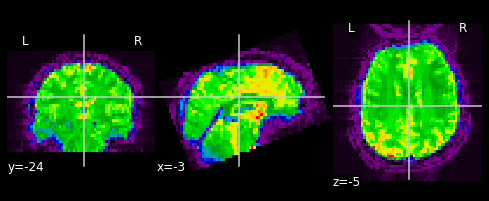

In [126]:
plot_epi(mean_func_img)

The same functional image using a different plotting function:

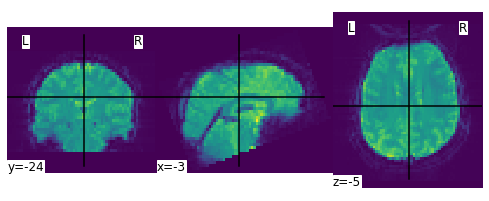

In [127]:
plot_img(mean_func_img)

We can also plot our mean functional image on top of the anatomical one, visualizing e.g., their correspondence in space or identify artifacts, etc. .

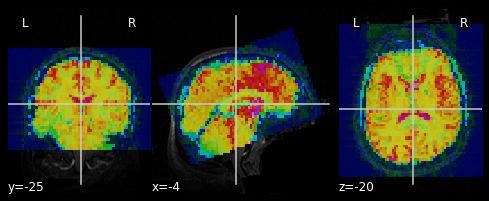

In [128]:
plot_roi(mean_func_img, bg_img=anat)

Remember the differences in the shapes between the anatomical and functional image? Do you why it is like that? Right, their resolution is very different. While anatomical images are (most of the time) acquired in high resolution, functional images have a comparable low resolution. For some analyses it is however necessary that the two images (an anatomical and a functional) have the same resolution. Hence, one of them needs to be resampled. Don't worry `nilearn` has a function just for that, where we don't need to do more, than provide a to be resampled image and an image to which resolution it should be resampled to. Let's resample the anatomical to the functional image:

In [129]:
print([mean_func_img.shape, anat.shape])

[(64, 64, 33), (160, 192, 192)]


In [130]:
resampled_anat = nl.image.resample_to_img(anat, mean_func_img)
resampled_anat.shape

(64, 64, 33)

How does our anatomical image look before and after resampling it to the functional one:

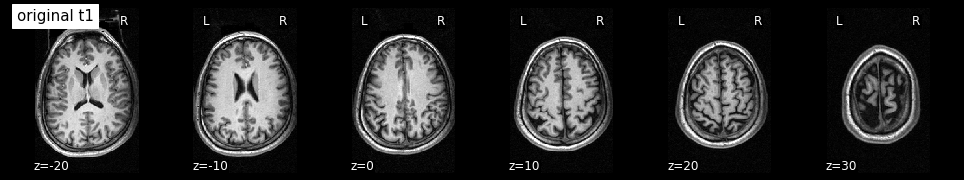

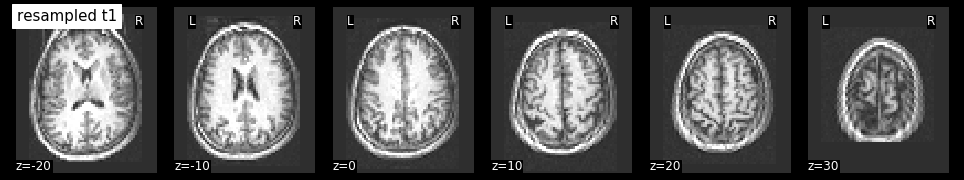

In [131]:
plot_anat(anat, title='original t1', display_mode='z', dim=-1,
                   cut_coords=[-20, -10, 0, 10, 20, 30])
plot_anat(resampled_anat, title='resampled t1', display_mode='z', dim=-1,
                   cut_coords=[-20, -10, 0, 10, 20, 30])

Another data operation that is part of almost every neuroimaging analyses pipeline is `smoothing`, which applies a Gaussian filter with a specified strength (the `smoothing kernel`, in most cases FWHM) along the first three dimensions of neuroimaging data. It is therefore a `spatial smoothing` (*please note that there's also temporal smoothing, but due to time reasons we won't cover that in this tutorial*). We're going to apply different smoothing strengths to our functional image and plot the smoothed images:

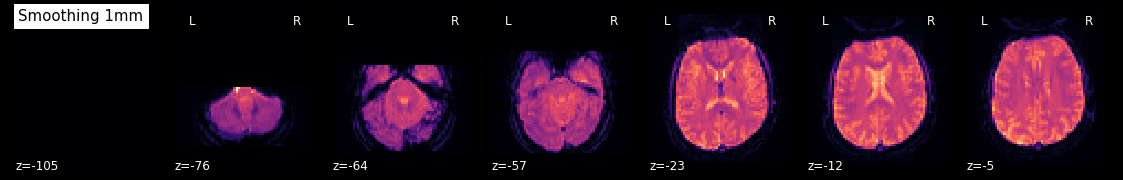

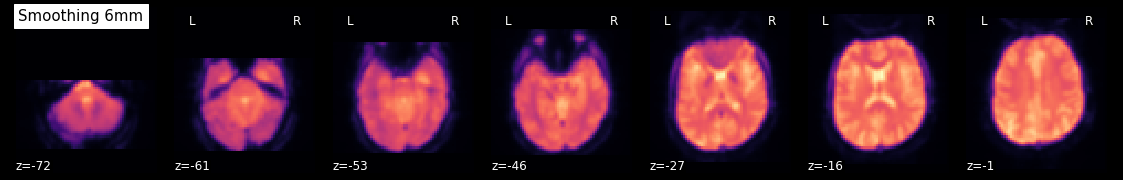

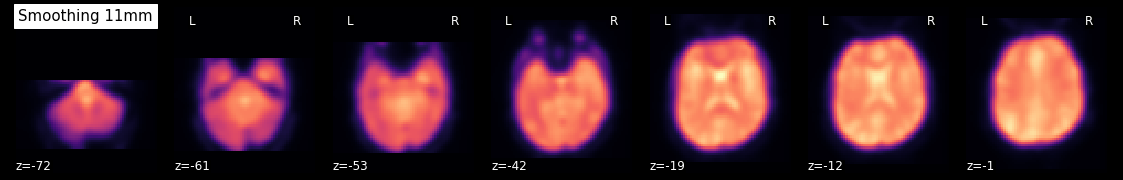

In [132]:
for fwhm in range(1, 12, 5):
    smoothed_img = nl.image.smooth_img(mean_func_img, fwhm)
    nl.plotting.plot_epi(smoothed_img, title="Smoothing %imm" % fwhm,
                     display_mode='z', cmap='magma')

*From the `nilearn` docs*: As we vary the smoothing FWHM, note how we decrease the amount of noise, but also loose spatial details. In general, the best amount of smoothing for a given analysis depends on the spatial extent of the effects that are expected.

`Nilearn` provides further options to improve the `SNR` of neuroimaging data through its `image.clean_image` function. Among those are `standardization` and `detrending`. In order to investigate what this actually does to the data, we're going to apply these operations and plot the time course of a single voxel. In order to apply these operations, we need to provide the TR of the data at hand. We can easily get that information from the `header`:  

In [133]:
tr = func_img.header['pixdim'][4]
tr

2.0

We begin with `detrending` our image. To do so, we need to set the respective argument in our command: 

In [134]:
func_img_d = nl.image.clean_img(func_img, detrend=True, standardize=False, t_r=tr)

Let's plot the same voxel of the original and detrended image to see the effect:

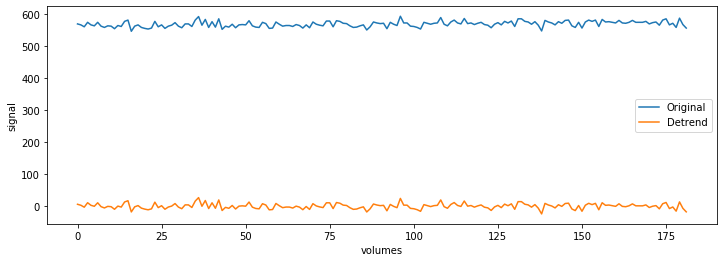

In [135]:
x, y, z = [31, 14, 7]
plt.figure(figsize=(12, 4))
plt.plot(np.transpose(func_img.get_data()[x, y, z, :]))
plt.plot(np.transpose(func_img_d.get_data()[x, y, z, :]))
plt.xlabel('volumes')
plt.ylabel('signal')
plt.legend(['Original', 'Detrend']);

Now we also include `standardization` and plot the difference between the `detrended` and `detrended + standardized` image at the same voxel as before:

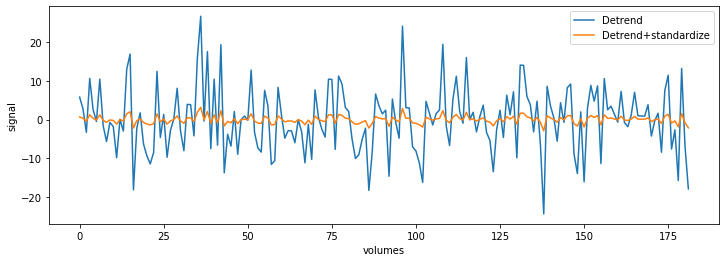

In [136]:
func_img_ds = nl.image.clean_img(func_img, detrend=True, standardize=True, t_r=tr)

plt.figure(figsize=(12, 4))
plt.plot(np.transpose(func_img_d.get_data()[x, y, z, :]))
plt.plot(np.transpose(func_img_ds.get_data()[x, y, z, :]))
plt.xlabel('volumes')
plt.ylabel('signal')
plt.legend(['Detrend', 'Detrend+standardize']);

In "real" analyses, we're usually not interested in the signal of a random voxel(s), bu those that belong to a certain region of interest (ROI). These ROIs can come from an atlas, a functional localizer, etc. . Within its `datasets` part `nilearn` provides functionality to access and work with a large amount of atlases and functional localizers as part of example or open data.  

In [ ]:
# nilearn datasets
nl.datasets.

For the sake of simplicity, we going to download an anatomical atlas called AAL (automated anatomical labeling), extract the data based on the ROIs that are included in the atlas and apply the same operations as above, plotting the results. At first, let's download the atlas:

In [137]:
atlas_aal = nl.datasets.fetch_atlas_aal()

It's of the data type `sklearn.utils.Bunch`:

In [138]:
type(atlas_aal)

sklearn.utils.Bunch

Included in the downloaded atlas are the spatial maps and the corresponding labels:

In [139]:
atlas_aal.maps

'/Users/peerherholz/nilearn_data/aal_SPM12/aal/atlas/AAL.nii'

In [140]:
atlas_aal.labels

['Precentral_L',
 'Precentral_R',
 'Frontal_Sup_L',
 'Frontal_Sup_R',
 'Frontal_Sup_Orb_L',
 'Frontal_Sup_Orb_R',
 'Frontal_Mid_L',
 'Frontal_Mid_R',
 'Frontal_Mid_Orb_L',
 'Frontal_Mid_Orb_R',
 'Frontal_Inf_Oper_L',
 'Frontal_Inf_Oper_R',
 'Frontal_Inf_Tri_L',
 'Frontal_Inf_Tri_R',
 'Frontal_Inf_Orb_L',
 'Frontal_Inf_Orb_R',
 'Rolandic_Oper_L',
 'Rolandic_Oper_R',
 'Supp_Motor_Area_L',
 'Supp_Motor_Area_R',
 'Olfactory_L',
 'Olfactory_R',
 'Frontal_Sup_Medial_L',
 'Frontal_Sup_Medial_R',
 'Frontal_Med_Orb_L',
 'Frontal_Med_Orb_R',
 'Rectus_L',
 'Rectus_R',
 'Insula_L',
 'Insula_R',
 'Cingulum_Ant_L',
 'Cingulum_Ant_R',
 'Cingulum_Mid_L',
 'Cingulum_Mid_R',
 'Cingulum_Post_L',
 'Cingulum_Post_R',
 'Hippocampus_L',
 'Hippocampus_R',
 'ParaHippocampal_L',
 'ParaHippocampal_R',
 'Amygdala_L',
 'Amygdala_R',
 'Calcarine_L',
 'Calcarine_R',
 'Cuneus_L',
 'Cuneus_R',
 'Lingual_L',
 'Lingual_R',
 'Occipital_Sup_L',
 'Occipital_Sup_R',
 'Occipital_Mid_L',
 'Occipital_Mid_R',
 'Occipital_Inf_L'

We can also plot the atlas to grasp its specificity, etc. :

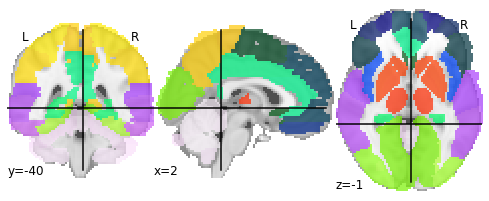

In [141]:
plot_roi(atlas_aal.maps)

But how can we extract the data within the ROIs from this atlas? `Nilearn` has a crucial function to do that: `Nifti(Maps/Labels)Masker` which allows you to specify ROIs from which data of a given image should be extracted. In more detail, we need to import the function, set up the `masker` object and then apply it to our data: 

In [142]:
from nilearn.input_data import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_aal.maps)

Let's `smooth` our `detrended` and `standardized` image before we extract the data. (*Please note, that certain operations can be included when setting up the `masker` object, e.g., `detrending` and `standardization`. 

In [143]:
func_img_ds_s = nl.image.smooth_img(func_img_ds, 4)

Cool, now we can apply the `masker` object:

In [144]:
func_img_ts = masker.fit_transform(func_img_ds_s)

What is returned? A volumes by labels, or functional image signal by ROI `numpy.ndarray`.

In [145]:
func_img_ts.shape

(182, 116)

In [146]:
func_img_ts.shape[1] == len(atlas_aal.labels)

True

As usual, we can now plot the data, that is time series, of a certain part, that is ROI.

Text(0.5, 1.0, 'signal within Parietal_Sup_L across volumes')

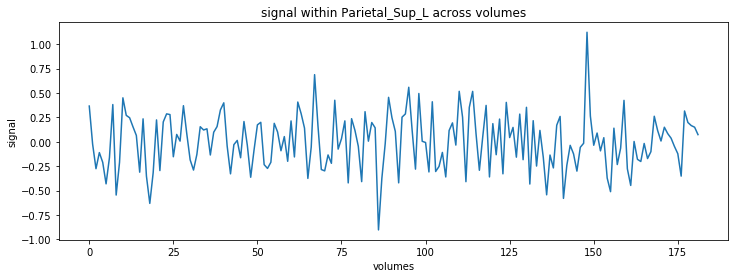

In [147]:
plt.figure(figsize=(12, 4))
plt.plot(np.transpose(func_img_ts[:, func_img_ts.shape[1]//2]))
plt.xlabel('volumes')
plt.ylabel('signal')
plt.title('signal within %s across volumes' % atlas_aal.labels[int(len(atlas_aal.labels)/2)])

Or the signal of within two ROIs, e.g., the same region from the left and right hemisphere. 

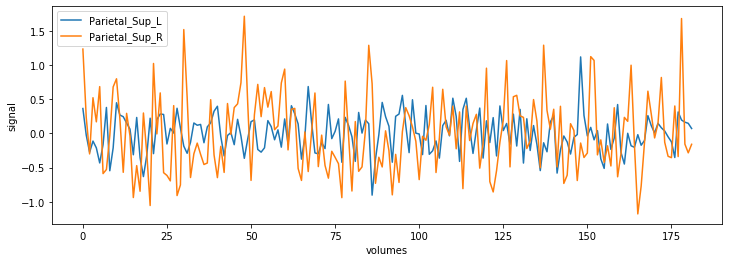

In [148]:
plt.figure(figsize=(12, 4))
plt.plot(np.transpose(func_img_ts[:, func_img_ts.shape[1]//2]))
plt.plot(np.transpose(func_img_ts[:, func_img_ts.shape[1]//2+1]))
plt.xlabel('volumes')
plt.ylabel('signal')
plt.legend([atlas_aal.labels[int(len(atlas_aal.labels)/2)], atlas_aal.labels[int(len(atlas_aal.labels)/2+1)]]);

## Exercises

* Compute the sum of square of an image (numpy)
* Extract time series from an atlas or ROI, compute the ROIxROI correlation matrix  

